In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create some data
np.random.seed(69)
x = 2 * np.random.rand(100,1)
y = 6 +3 * x+np.random.randn(100,1)

![Alt text](image.png)

m [1.78305726], b [1.76703231], loss [81.8027251] iteration 0
m [2.84965615], b [2.85503813], loss [31.17250161] iteration 1
m [3.48202019], b [3.53066162], loss [12.51774701] iteration 2
m [3.85135328], b [3.95567877], loss [5.63246738] iteration 3
m [4.06150782], b [4.22824527], loss [3.07992254] iteration 4
m [4.17547668], b [4.40792027], loss [2.12301311] iteration 5
m [4.23146496], b [4.53084739], loss [1.75431381] iteration 6
m [4.25264014], b [4.61896457], loss [1.60299722] iteration 7
m [4.25304719], b [4.68559133], loss [1.53253418] iteration 8
m [4.24119704], b [4.7388184], loss [1.49263012] iteration 9
m [4.22224357], b [4.78356412], loss [1.46473096] iteration 10
m [4.19930431], b [4.82282195], loss [1.4419669] iteration 11
m [4.17426166], b [4.85841737], loss [1.42177067] iteration 12
m [4.14824896], b [4.89146696], loss [1.40316062] iteration 13
m [4.12194533], b [4.92265704], loss [1.3857407] iteration 14
m [4.09575462], b [4.95241265], loss [1.36933224] iteration 15
m [

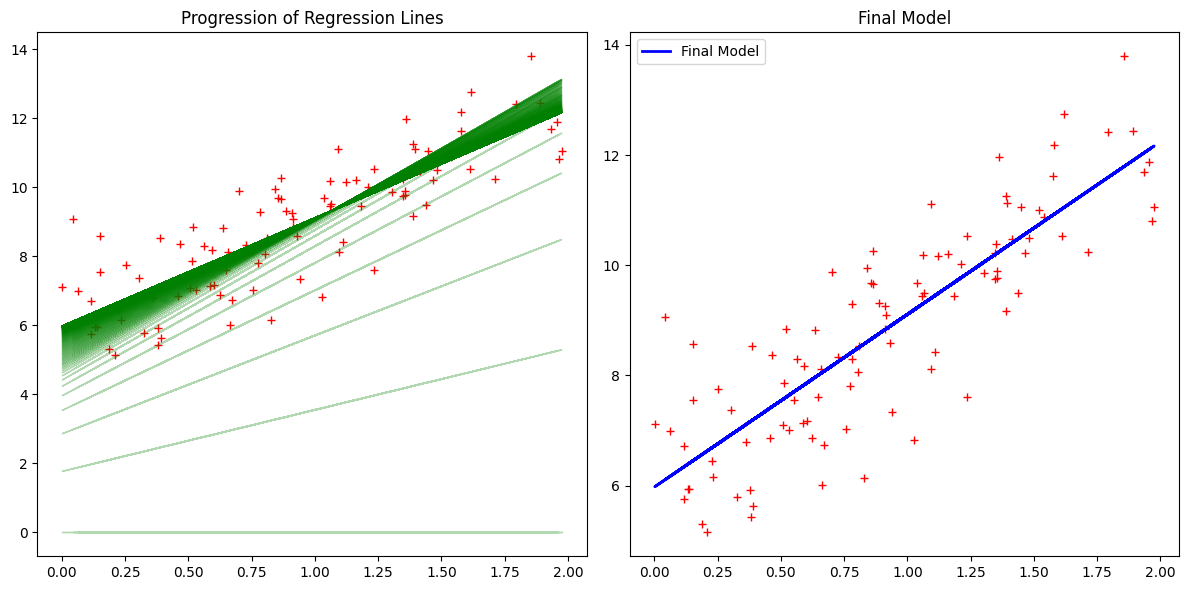

In [8]:
def gradient_descent1(x, y):
    # y = mx + b
    m_curr = b_curr = 0
    iterations = 100
    n = len(x)
    learning_rate = 0.1

    # Lists to store intermediate y_predicted values, used for plotting
    y_predicted_list = []

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        y_predicted_list.append(y_predicted)
        L = (1/n) * sum([val**2 for val in (y - y_predicted)])
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, loss {} iteration {}".format(m_curr, b_curr, L, i))

    # Plot the progression of regression lines during iterations
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='red', marker='+', linewidth=1)
    for i, y_predicted in enumerate(y_predicted_list):
        plt.plot(x, y_predicted, color='green', alpha=0.3, linewidth=1, label=f'Iteration {i}')
    plt.title('Progression of Regression Lines')

    # Plot the final regression line in its own plot
    plt.subplot(1, 2, 2)
    final_y_predicted = m_curr * x + b_curr
    plt.scatter(x, y, color='red', marker='+', linewidth=1)
    plt.plot(x, final_y_predicted, color='blue', label='Final Model', linewidth=2)
    plt.legend()
    plt.title('Final Model')

    plt.tight_layout()
    plt.show()


gradient_descent1(x, y)

In [4]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
print(reg.coef_, reg.intercept_)

[[3.13540648]] [5.97223849]


In [1]:
def get_full_sample_matrix(samples):
    '''
    The code below transforms a sample matrix into the final X matrix
    with the additional ones at the start of each row.
    '''
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)
        
    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])

In [12]:
X = get_full_sample_matrix(x)

![Alt text](image-1.png)

![Alt text](image-2.png)

In [15]:
from numpy import linalg as LA
def gradient_descent2(X, y):
    m_curr = b_curr = 0
    iterations = 1000
    learning_rate = 0.05
    n = len(x)
    B = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        errors = y - X.dot(B)
        L = 1/n * (LA.norm(errors))**2
        grad = -2/n * (X.T).dot(errors)
        B = B - learning_rate*grad
        print ("m {}, b {}, loss {} iteration {}".format(B[1][0],B[0][0],L, i))
    return B

In [16]:
gradient_descent2(X,y)

m 0.8915286304703278, b 0.8835161545351706, loss 81.80272509655315 iteration 0
m 1.6039426669845103, b 1.597275686465438, loss 53.390928281672224 iteration 1
m 2.1725200511367286, b 2.1746091167777317, loss 35.04966651021521 iteration 2
m 2.62559999697692, b 2.6422927041942765, loss 23.207521392543832 iteration 3
m 2.9859476207073974, b 3.0218374429368215, loss 15.559696371493892 iteration 4
m 3.271850192392159, b 3.330524557099465, loss 10.61880136090954 iteration 5
m 3.497997790818341, b 3.582237347421126, loss 7.4249544633233455 iteration 6
m 3.6761907623322596, b 3.7881294412517112, loss 5.358697952393245 iteration 7
m 3.815908045622953, b 3.957161619829966, loss 4.020264787867789 iteration 8
m 3.9247637255545076, b 4.096533069398509, loss 3.1516640251875767 iteration 9
m 4.008873797724907, b 4.212027819518693, loss 2.5863991267355204 iteration 10
m 4.073150802354891, b 4.308293048476323, loss 2.217018990656698 iteration 11
m 4.12154051324284, b 4.389062655282441, loss 1.9741772107

array([[5.97223695],
       [3.13540794]])